# NK model

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper', font_scale=2)
red, blue, green = sns.color_palette('Set1', 3)

In [11]:
def neighbors(genotype, genotypes):
    return [g for g in genotypes if abs(g ^ genotype).sum() == 1]

def int2bits(k, N):
    x = list(map(int, bin(k)[2:]))
    pad = N - len(x)
    x = [0]*pad + x
    return x

def all_genotypes(N):
    return np.array([int2bits(k, N) for k in range(2**N)], dtype=bool)

In [8]:
def fitness_i(genotype, i, contribs, mem):
    key = tuple(genotype[contribs[i]])
    if key not in mem:
        mem[key] = np.random.uniform(0, 1)
    return mem[key]

def fitness(genotype, contribs, mem):
    return np.mean([
        fitness_i(genotype, i, contribs, mem) 
        for i in range(len(genotype))
    ])

In [12]:
def plot_NK_model(N, K, ax=None):
    genotypes = all_genotypes(N)
    contribs = {
        i: sorted(np.random.choice(
            [n for n in range(N) if n != i], 
            K, 
            replace=False
        ).tolist() + [i])
        for i in range(N)
    }
    fitness_mem = {}

    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))

    for i, genotype in enumerate(genotypes):
        wi = fitness(genotype, contribs, fitness_mem)
        maximum = True
        minimum = True
        for g in neighbors(genotype, genotypes):
            w = fitness(g, contribs, fitness_mem)
            ax.plot(
                [genotype.sum(), g.sum()], 
                [wi, w], 
                ls='-', color='k', marker='', alpha=0.1
            )
            if w > wi: maximum = False
            if w < wi: minimum = False
        if maximum:
            ax.plot(genotype.sum(), wi, '^', color=red, markersize=10)
        elif minimum:
            ax.plot(genotype.sum(), wi, 'v', color=red, markersize=10)
        else:
            ax.plot(genotype.sum(), wi, '.', color=blue, markersize=10)
    ax.set(
        xlabel='Distance from {}'.format('0'*N),
        ylabel='Fitness',
    )
    sns.despine()
    return ax

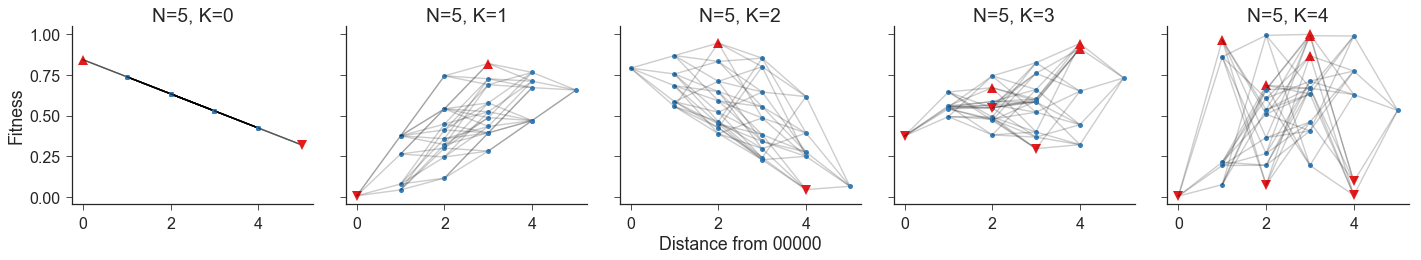

In [33]:
N = 5
fig, axes = plt.subplots(1, N, figsize=(4*N, 4), sharex=True, sharey=True)
for k, ax in enumerate(axes):
    plot_NK_model(5, k, ax=ax)
    ax.set_title('N={}, K={}'.format(len(axes), k))
    if k != 0:
        ax.set_ylabel('')
    if k != 2:
        ax.set_xlabel('')
fig.tight_layout()
fig.savefig('NK_model.png')
fig.savefig('NK_model.pdf', dpi=300, papertype='a4')